In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/wineData-1.npy" "/content/"
!ln -s "/content/drive/My Drive/Academic/CSCM45J - Big Data & Machine Learning/Lab 3/wineLabels-1.npy" "/content/"

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization


Task 4.1

Shape of original dataset : (178, 13)
Shape of Training dataset : (142, 13)
Shape of mean of dataset : (13,)
Y-Y_Hat : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy : 1.0


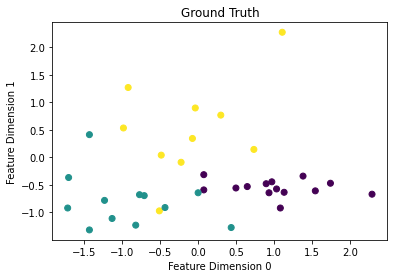

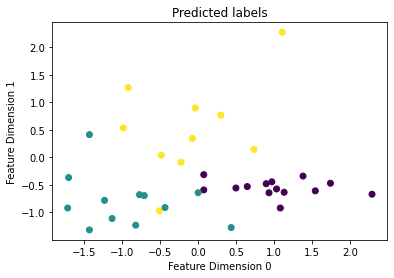

In [ ]:
from numpy.ma.core import size
wine_data = np.load('wineData-1.npy')
wine_labels = np.load('wineLabels-1.npy')
print(f'Shape of original dataset : {wine_data.shape}') # (178, 13)

""" Split dataset into training and testing """
x_train,x_test,y_train,y_test = train_test_split(wine_data, wine_labels, train_size=0.8) # 0.8 >> 80% for training
print(f'Shape of Training dataset : {x_train.shape}') # (142, 13)


""" Data standardization """
scaler = StandardScaler()
# Calculate mean and variance of each feature for further pre-processing
scaler.fit(X = x_train, y = y_train) 
print(f'Shape of mean of dataset : {scaler.mean_.shape}') # (13,)
# Standardize data (Centering and Scaling)
x_train_standard = scaler.transform(X = x_train)
x_test_standard = scaler.transform(X = x_test)


""" Train Support Vector Machine Classifier """
svc = SVC(C = 1, kernel = 'rbf') # Kernel = Radial Basis Function Kernel(Gaussian Kernel)
# Train the model using training data
svc.fit(X = x_train_standard, y = y_train) 
# Predict labels from trained model
y_hat = svc.predict(X = x_test_standard)
# Calculate accuracy
diff = y_test - y_hat
print(f'Y-Y_Hat : {diff}')
accuracy = svc.score(X = x_test_standard, y = y_test)
print(f'Accuracy : {accuracy}')


""" Scatter Plot """
plt.figure()
plt.title(label = 'Ground Truth')
plt.xlabel(xlabel = 'Feature Dimension 0')
plt.ylabel(ylabel = 'Feature Dimension 1')
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c = y_test-1)
plt.figure()
plt.title(label = 'Predicted labels')
plt.xlabel(xlabel = 'Feature Dimension 0')
plt.ylabel(ylabel = 'Feature Dimension 1')
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c = y_hat-1)
plt.show()






Task 4.2

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 50)                700       
                                                                 
 dense_43 (Dense)            (None, 50)                2550      
                                                                 
 dense_44 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3,403
Trainable params: 3,403
Non-trainable params: 0
_________________________________________________________________


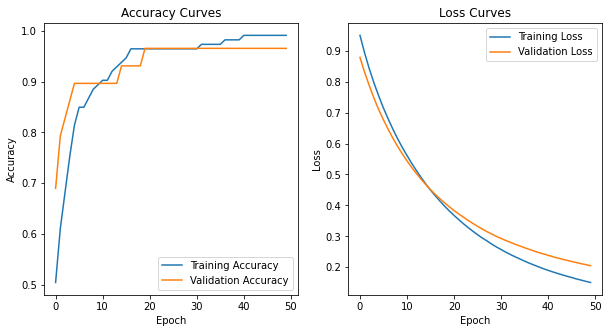

2/2 [==============================] - 0s 12ms/step - loss: 0.1554 - sparse_categorical_accuracy: 0.9722
Test set loss: 0.16, test set accuracy: 97.22%


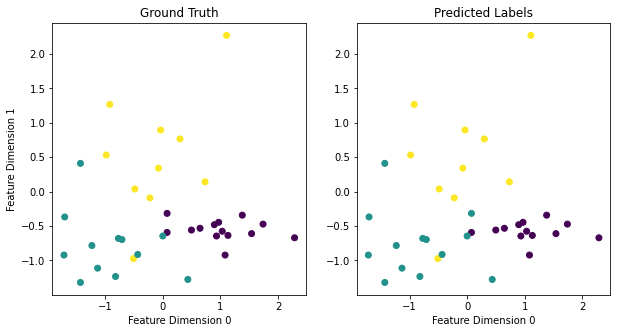

In [ ]:
""" Define ANN Model """
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

""" Compile Model """
model.compile(optimizer=tf.keras.optimizers.SGD(), # Strochastic Gradient Descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Cross Entrophy Function
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()) # Consider Model Accuracy

""" Train The Model """
history = model.fit(x_train_standard, y_train, epochs=50, validation_split=0.2, verbose=0)

""" Print The Summary """
model.summary()

"""  Plot Accuracy And Loss Curves """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# Predict labels from trained model
y_hat = model.predict(x_test_standard)

""" Evaluate With Test Datatset """
results = model.evaluate(x_test_standard, y_test) # [loss value, metric value]
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

""" Scatter Plot """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c = y_test-1)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(x = x_test_standard[:,0], y = x_test_standard[:,1], c=np.argmax(y_hat, axis=1))
plt.show()



Task 4.3

(60000, 28, 28)
(60000, 784)
10
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (32, 100)                 78500     
                                                                 
 dense_38 (Dense)            (32, 100)                 10100     
                                                                 
 dense_39 (Dense)            (32, 10)                  1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


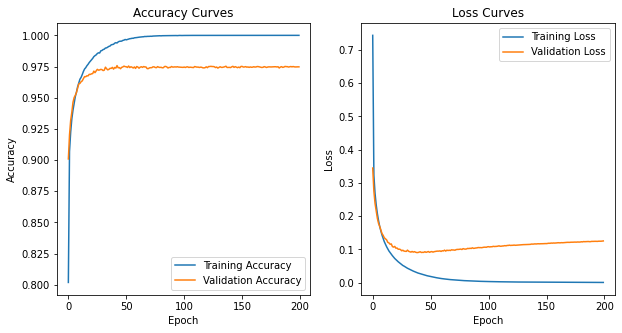

313/313 [==============================] - 1s 4ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9771
Test set loss: 0.11, test set accuracy: 97.71%
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
""" Load Dataset """
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
print(x_train_mnist.shape) # (6000, 28, 28)
number_of_labels = len(np.unique(y_train_mnist))

""" Flattern Datatset """
x_train_mnist_flatterned = np.reshape(a = x_train_mnist, newshape=(x_train_mnist.shape[0], -1))
x_test_mnist_flatterned = np.reshape(a = x_test_mnist, newshape=(x_test_mnist.shape[0], -1))
print(x_train_mnist_flatterned.shape)

""" Normalized Datatset """
max_pixel_value = np.max(x_train_mnist_flatterned)
x_train_mnist_normalized = x_train_mnist_flatterned/max_pixel_value
x_test_mnist_normalized = x_test_mnist_flatterned/max_pixel_value

""" Define ANN Model """
print(f'Number of labels : {number_of_labels}')
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(100, activation=tf.nn.relu), # 1st hidden layer : 784 neurons
    tf.keras.layers.Dense(100, activation=tf.nn.relu), # 1st hidden layer : 784 neurons
    tf.keras.layers.Dense(number_of_labels, activation=tf.nn.softmax)]) # output layer : 3 neurons

""" Compile Model """
model.compile(optimizer=tf.keras.optimizers.SGD(), # Strochastic Gradient Descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Cross Entrophy Function
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()) # Consider Model Accuracy

""" Train The Model """
history = model.fit(x_train_mnist_normalized, y_train_mnist, epochs=200, validation_split=0.2, verbose=0)

""" Print The Summary """
model.summary()

"""  Plot Accuracy And Loss Curves """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# Predict labels from trained model
y_hat = model.predict(x_test_mnist_normalized)

""" Evaluate With Test Datatset """
results = model.evaluate(x_test_mnist_normalized, y_test_mnist)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

""" Analyse Training Cureves """
print(y_test_mnist)
print(np.argmax(y_hat, axis=1))


Task 4.4

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/5
1500/1500 [==============================] - 14s 8ms/step - loss: 0.5210 - sparse_categorical_accuracy: 0.8380 - val_loss: 0.1548 - val_sparse_categorical_accuracy: 0.9514
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1170 - sparse_categorical_accuracy: 0.9638 - val_loss: 0.0942 - val_sparse_categorical_accuracy: 0.9719
Epoch 3/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9745 - val_loss: 0.0745 - val_sparse_categorical_accuracy: 0.9761
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9797
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0618 - val_sparse_categorical_accuracy: 0.9803
Model: "sequential_15"
_____________________________

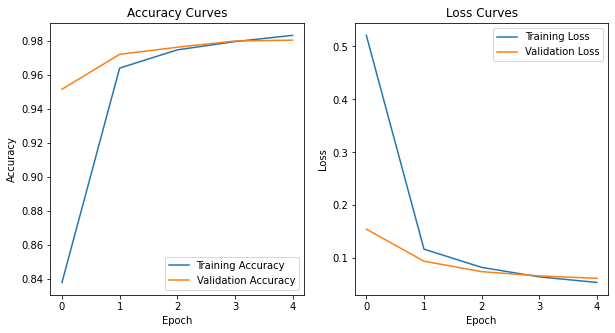

313/313 [==============================] - 2s 5ms/step - loss: 0.0446 - sparse_categorical_accuracy: 0.9859
Test set loss: 0.04, test set accuracy: 98.59%
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
""" Expand Dimension For Channel """
x_train_mnist_expand = np.expand_dims(a = x_train_mnist, axis = 3)
x_test_mnist_expand = np.expand_dims(a = x_test_mnist, axis = 3)
print(x_train_mnist_expand.shape)
print(x_test_mnist_expand.shape)

""" Normalize Pixel Values """
max_pixel_value = np.max(x_train_mnist_expand)
x_train_mnist_cnn_norm = x_train_mnist_expand/max_pixel_value
x_test_mnist_cnn_norm = x_test_mnist_expand/max_pixel_value

""" Define Image Sizes """
Image_Width=28 # pixel width of image.
Image_Height=28 # pixel height of image.
Image_Size=(Image_Width,Image_Height) # resolution of image.
Image_Channels=1 # number of colour channels in images.

""" Define CNN Architecture : 2D CNN Layers"""
model = Sequential()

### Feature Extraction Layers = Convolutional-Subsampling Pairs (Increase number of feature maps for each subsequent pairs)
model.add(Conv2D(filters=24,kernel_size=5,strides=1,padding='same',activation='relu', input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=48,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Classification Layers = Dense Layers
model.add(Flatten())
model.add(Dense(256,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.SGD(), # Strochastic Gradient Descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Cross Entrophy Function
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()) # Consider Model Accuracy


""" Train The Model """
history = model.fit(x_train_mnist_cnn_norm, y_train_mnist, epochs=5, validation_split=0.2, verbose=1)

""" Print The Summary """
model.summary()

"""  Plot Accuracy And Loss Curves """
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# Predict labels from trained model
y_hat = model.predict(x_test_mnist_cnn_norm)

""" Evaluate With Test Datatset """
results = model.evaluate(x_test_mnist_cnn_norm, y_test_mnist)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

""" Analyse Training Cureves """
print(y_test_mnist)
print(np.argmax(y_hat, axis=1))


4.5 Challenge Task

(1)
Deep learning is used to imitate human brain.

(2)

Increase number of neurons in hiden layers to make wider neural network.
Increase number of hiden layers in the model to make deeper neural network.

(3)

(4)

The model gradually learns weights in each epoch to reduce loss function. For instance, the model uses random weights in the first epoch that has higher loss and proceeding epoches use weights learned in the previous iteration which improve accuracy. 

(5)

Hyperparameter : configuration whose value can not be estimated from data and should be provided externally(data science experts)

Examples 
* Number of hidden layers in multi layer perceptron
* Kernal size, Number of filters, and pool size in convolutional neural network
* Parameter C, which is inversely propotional to the margin, in the SVM model


**Apendix** 


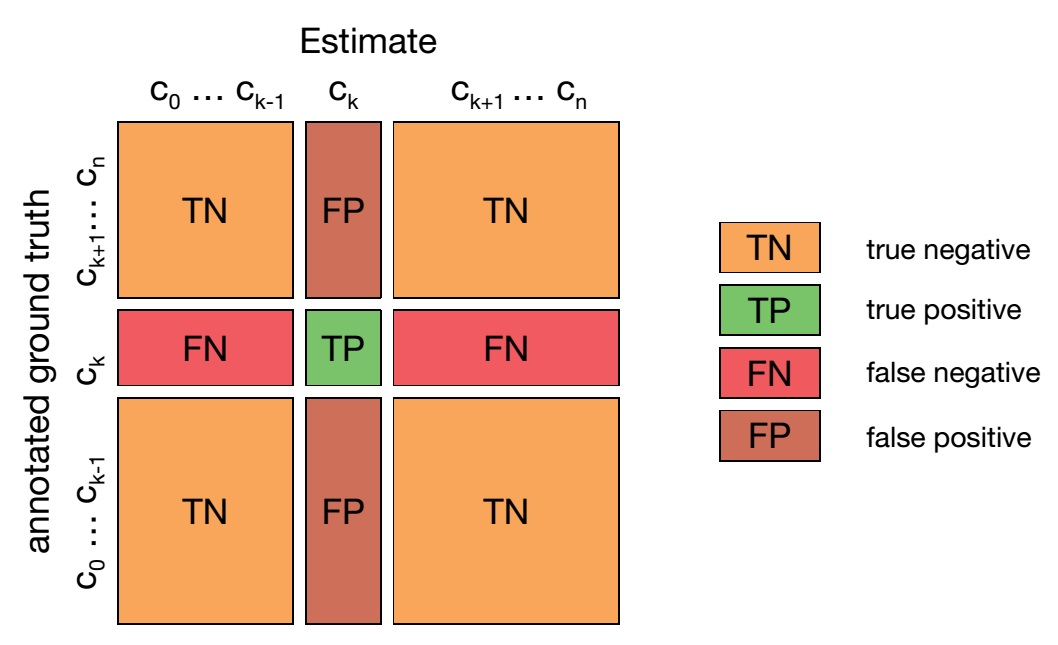



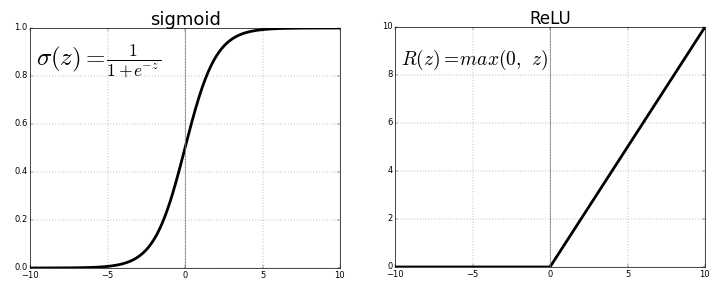

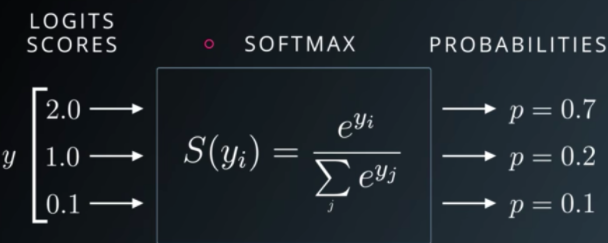